In [1]:
import pandas as pd
import numpy as np
from numpy import where
import collections
from collections import Counter
import sklearn
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [2]:
h17 = pd.read_excel('/Users/mac/Desktop/TFG/data/tables/ARG/household/2017/data/usu_hogar_t117.xlsx')  
h17

,CODUSU,ANO4,TRIMESTRE,NRO_HOGAR,REALIZADA,REGION,MAS_500,AGLOMERADO,PONDERA,IV1,...,GDECCFR,PDECCFR,ADECCFR,PONDIH,VII1_1,VII1_2,VII2_1,VII2_2,VII2_3,VII2_4
0,TQRMNORUTHJMLPCDEFIAH00498017,2017,1,1,1,43,S,2,534,2,...,12,,12,0,1,2,98,0,0,0
1,TQSMNOQSXHKMLMCDEFIAH00469221,2017,1,1,1,43,S,2,551,1,...,8,,8,1015,1,0,98,0,0,0
2,TQRMNOPVVHKOLOCDEFIAH00469258,2017,1,1,1,43,S,2,830,1,...,4,,4,1517,1,0,98,0,0,0
3,TQRMNOPVYHKOLOCDEFIAH00469262,2017,1,1,1,43,S,2,830,1,...,12,,12,0,1,0,4,0,0,0
4,TQRMNOPSUHJNLRCDEFIAH00497935,2017,1,1,1,43,S,2,530,1,...,12,,12,0,1,2,98,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18472,TQRMNOSSQHKMKTCDEOJAH00487337,2017,1,2,1,44,N,93,106,1,...,,10,10,125,1,0,98,0,0,0
18473,TQRMNOPRRHLMKSCDEOJAH00507807,2017,1,1,1,44,N,93,69,1,...,,4,3,100,1,0,98,0,0,0
18474,TQRMNOPRTHLMKSCDEOJAH00507814,2017,1,1,1,44,N,93,69,1,...,,4,4,79,1,0,98,0,0,0
18475,TQRMNOQURHLMKSCDEOJAH00507813,2017,1,1,1,44,N,93,69,1,...,,6,6,88,1,0,98,0,0,0


In [3]:
for col in h17.columns:
    print(col)

CODUSU
ANO4
TRIMESTRE
NRO_HOGAR
REALIZADA
REGION
MAS_500
AGLOMERADO
PONDERA
IV1
IV1_ESP
IV2
IV3
IV3_ESP
IV4
IV5
IV6
IV7
IV7_ESP
IV8
IV9
IV10
IV11
IV12_1
IV12_2
IV12_3
II1
II2
II3
II3_1
II4_1
II4_2
II4_3
II5
II5_1
II6
II6_1
II7
II7_ESP
II8
II8_ESP
II9
V1
V2
V21
V22
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19_A
V19_B
IX_TOT
IX_MEN10
IX_MAYEQ10
ITF
DECIFR
IDECIFR
RDECIFR
GDECIFR
PDECIFR
ADECIFR
IPCF
DECCFR
IDECCFR
RDECCFR
GDECCFR
PDECCFR
ADECCFR
PONDIH
VII1_1
VII1_2
VII2_1
VII2_2
VII2_3
VII2_4


In [4]:
var17 = h17[['IV1', 'IV2','IV6','IV8', 'IV9','IV12_1', 'II2','II4_1', 'II4_3','V1', 'ITF', 'IPCF','AGLOMERADO']]
var17

,IV1,IV2,IV6,IV8,IV9,IV12_1,II2,II4_1,II4_3,V1,ITF,IPCF,AGLOMERADO
0,2,3,1,1,1,2,2,2,2,1,0,0.00,2
1,1,2,1,1,1,2,1,1,2,2,11000,11000.00,2
2,1,2,1,1,1,2,2,1,2,1,11000,5500.00,2
3,1,3,1,1,1,2,3,1,2,1,0,0.00,2
4,1,4,1,1,1,2,2,1,2,1,0,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18472,1,1,1,1,1,2,1,1,2,1,22000,22000.00,93
18473,1,3,1,1,1,2,1,1,1,1,13000,4333.33,93
18474,1,3,1,1,1,2,2,1,1,1,21000,5250.00,93
18475,1,6,1,1,1,2,2,1,1,1,43800,7300.00,93


In [5]:
var17.value_counts()

IV1  IV2  IV6  IV8  IV9  IV12_1  II2  II4_1  II4_3  V1  ITF    IPCF     AGLOMERADO
1    3    1    1    1    2       2    1      2      1   0      0.00     33            96
                                             1      1   0      0.00     33            44
2    3    1    1    1    2       2    1      2      1   0      0.00     32            41
1    2    1    1    1    2       2    1      2      1   0      0.00     33            36
                                 1    1      2      1   0      0.00     33            36
                                                                                      ..
     3    1    1    1    2       2    1      1      1   23000  5750.00  26             1
                                                                        33             1
                                                                        34             1
                                                               7666.67  34             1
6    3    2    1    2    1 

In [6]:
null_counts = var17.isnull().sum()
print(null_counts)

IV1           0
IV2           0
IV6           0
IV8           0
IV9           0
IV12_1        0
II2           0
II4_1         0
II4_3         0
V1            0
ITF           0
IPCF          0
AGLOMERADO    0
dtype: int64


In [7]:
print(var17.describe())

                IV1           IV2           IV6           IV8           IV9  \
count  18477.000000  18477.000000  18477.000000  18477.000000  18477.000000   
mean       1.217784      3.083293      1.024409      1.003301      1.031390   
std        0.454086      2.543801      0.159493      0.057364      0.192661   
min        1.000000      1.000000      1.000000      1.000000      0.000000   
25%        1.000000      2.000000      1.000000      1.000000      1.000000   
50%        1.000000      3.000000      1.000000      1.000000      1.000000   
75%        1.000000      4.000000      1.000000      1.000000      1.000000   
max        6.000000     99.000000      3.000000      2.000000      3.000000   

             IV12_1           II2         II4_1         II4_3            V1  \
count  18477.000000  18477.000000  18477.000000  18477.000000  18477.000000   
mean       1.927207      1.905937      1.058343      1.687503      1.206148   
std        0.259804      0.852467      0.239197    

                 IV1       IV2       IV6       IV8       IV9    IV12_1  \
IV1         1.000000 -0.090394  0.041686  0.053432  0.034451  0.045842   
IV2        -0.090394  1.000000 -0.061174 -0.037492 -0.044872  0.001886   
IV6         0.041686 -0.061174  1.000000  0.150916  0.466495 -0.087737   
IV8         0.053432 -0.037492  0.150916  1.000000 -0.308113 -0.012927   
IV9         0.034451 -0.044872  0.466495 -0.308113  1.000000 -0.073292   
IV12_1      0.045842  0.001886 -0.087737 -0.012927 -0.073292  1.000000   
II2        -0.195960  0.249462 -0.065117 -0.044562 -0.040681 -0.037272   
II4_1       0.068382 -0.048015  0.147103  0.056963  0.132905 -0.061427   
II4_3       0.194019 -0.122742  0.090259  0.028474  0.087569 -0.008185   
V1          0.034530 -0.014527 -0.017785  0.000956 -0.021821  0.044854   
ITF        -0.005370  0.079137 -0.049291 -0.026495 -0.046998  0.020005   
IPCF        0.094958  0.014541 -0.055662 -0.022462 -0.054995  0.042882   
AGLOMERADO  0.022128 -0.027393 -0.0024

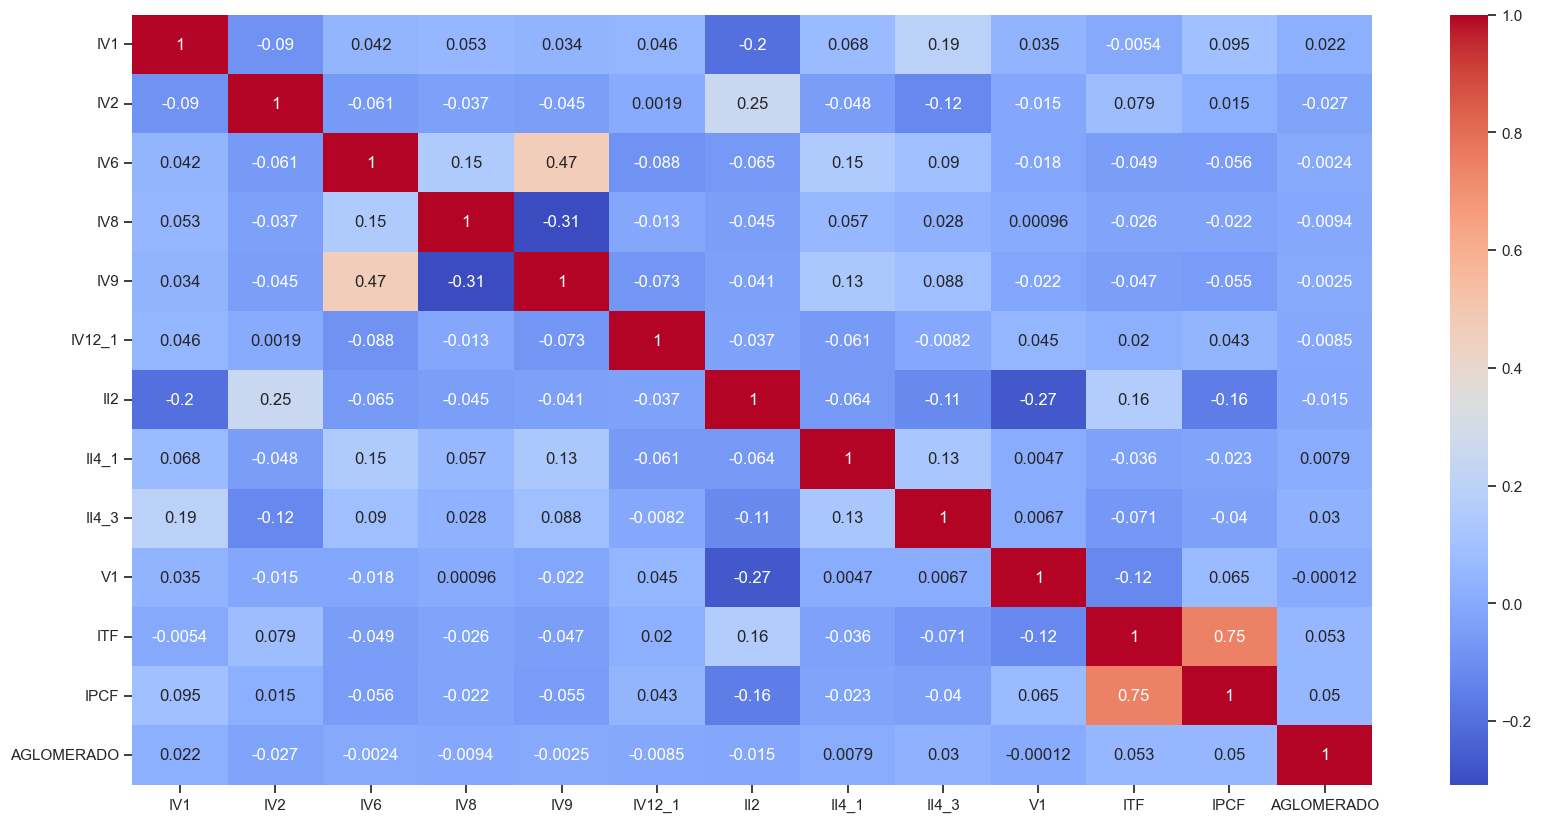

In [8]:
print(var17.corr())
sns.set(style="ticks")
plt.figure(figsize=(20,10))
sns.heatmap(var17.corr(), annot=True, cmap='coolwarm')
plt.show()

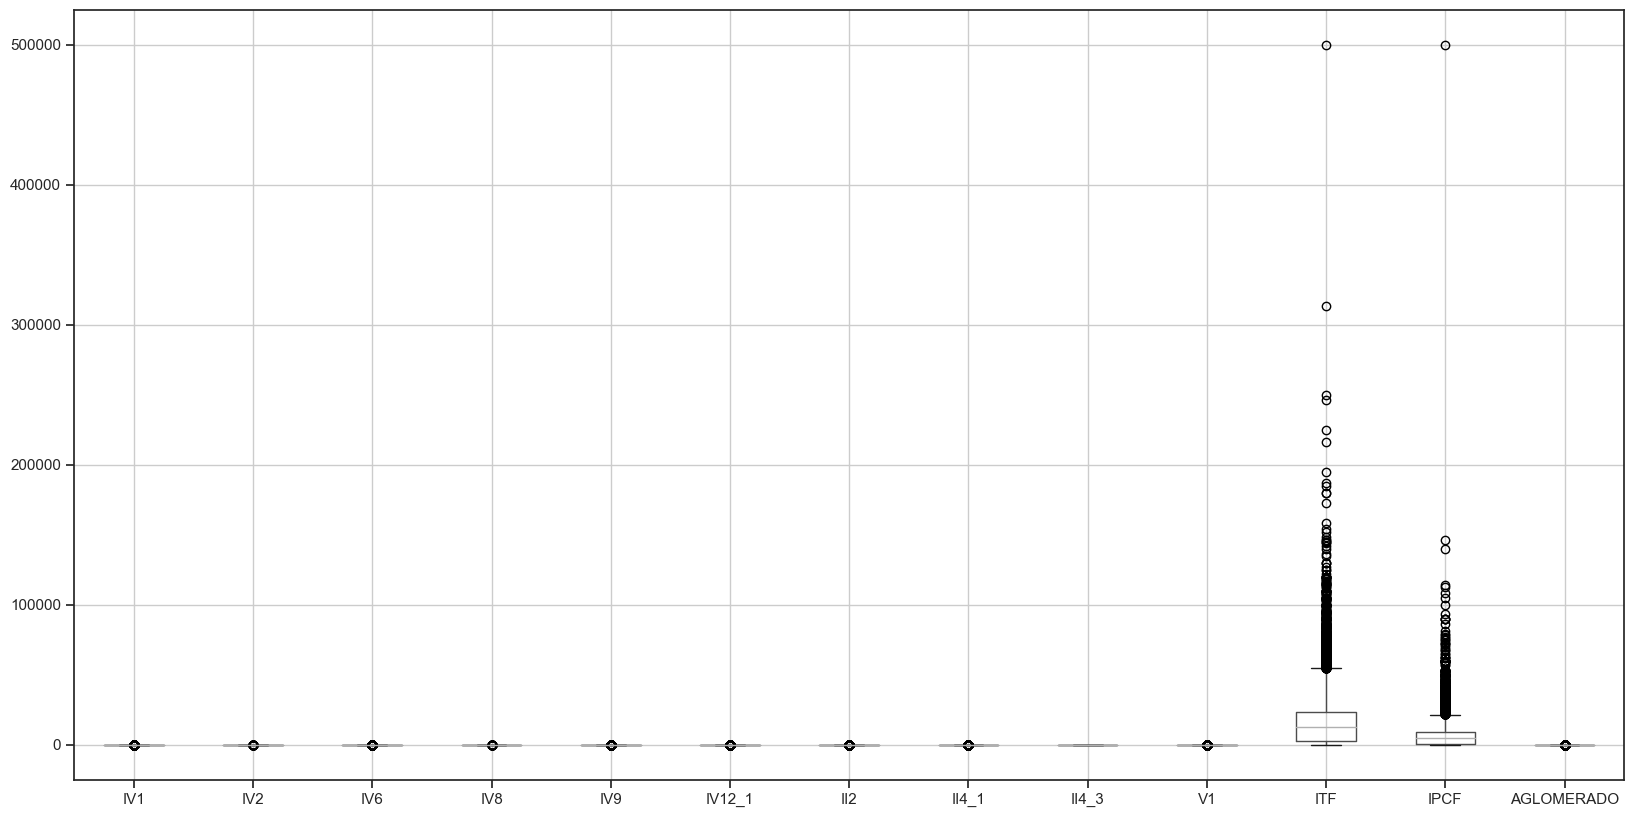

In [9]:
var17.boxplot(figsize=(20,10))
plt.show()

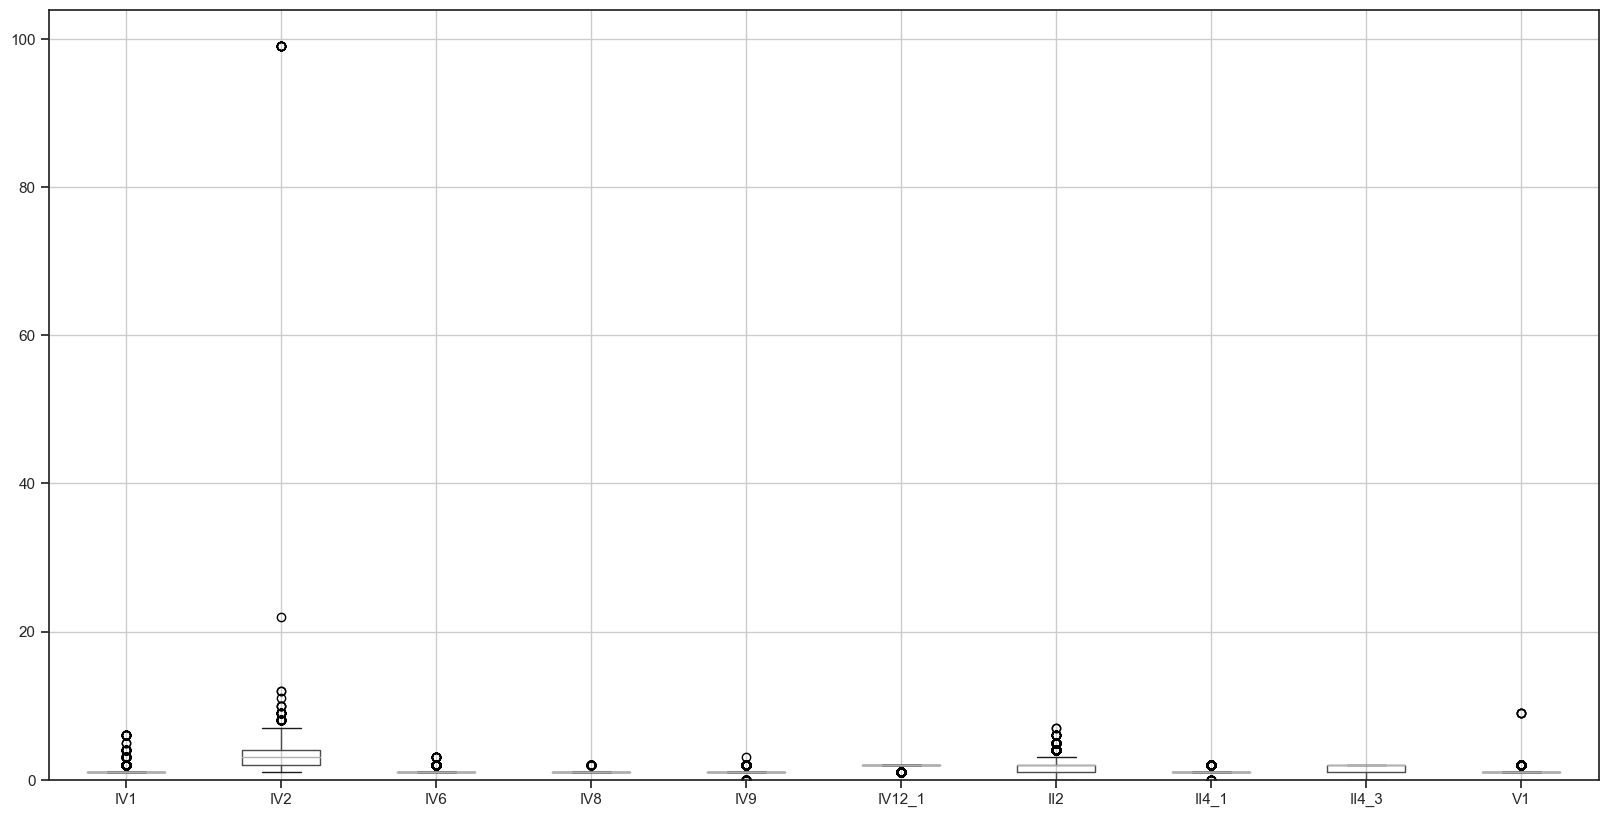

In [10]:
box=var17.drop(['ITF','IPCF','AGLOMERADO'],axis=1)
box.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

In [11]:
var17['IV2'].value_counts()

3     6648
2     4509
4     3882
1     1629
5     1221
6      393
7      128
8       35
9       15
99      10
10       3
12       2
22       1
11       1
Name: IV2, dtype: int64

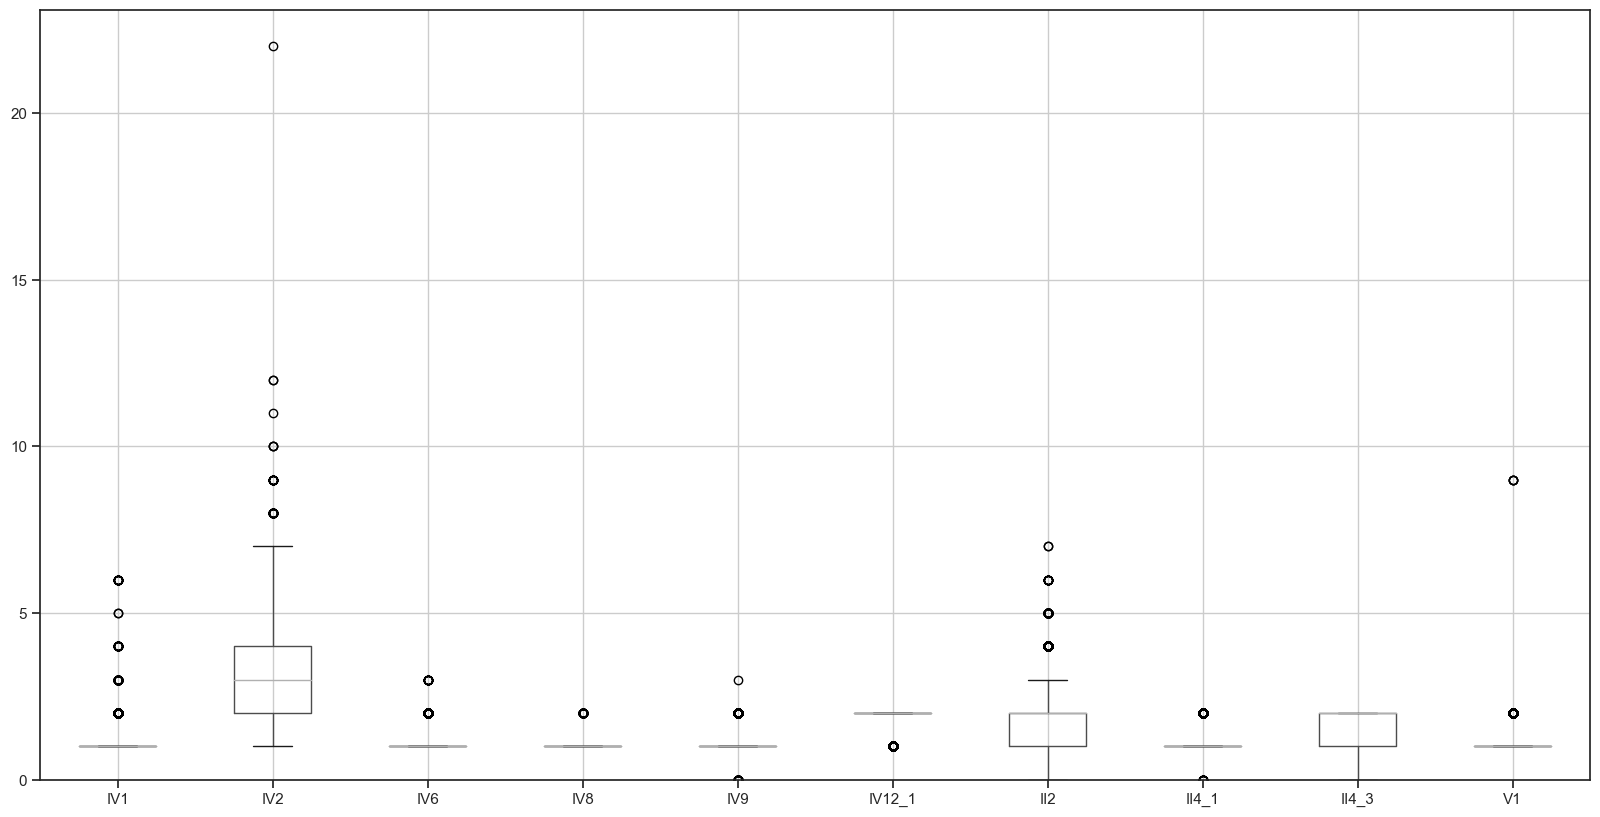

In [12]:
mean_IV2 = np.mean(var17.loc[var17['IV2'] != 99, 'IV2'])
var17.loc[var17['IV2'] == 99, 'IV2'] = mean_IV2
var17['IV2'].value_counts()
box=var17.drop(['ITF','IPCF','AGLOMERADO'],axis=1)
box.boxplot(figsize=(20,10))
plt.ylim(0, None)
plt.show()

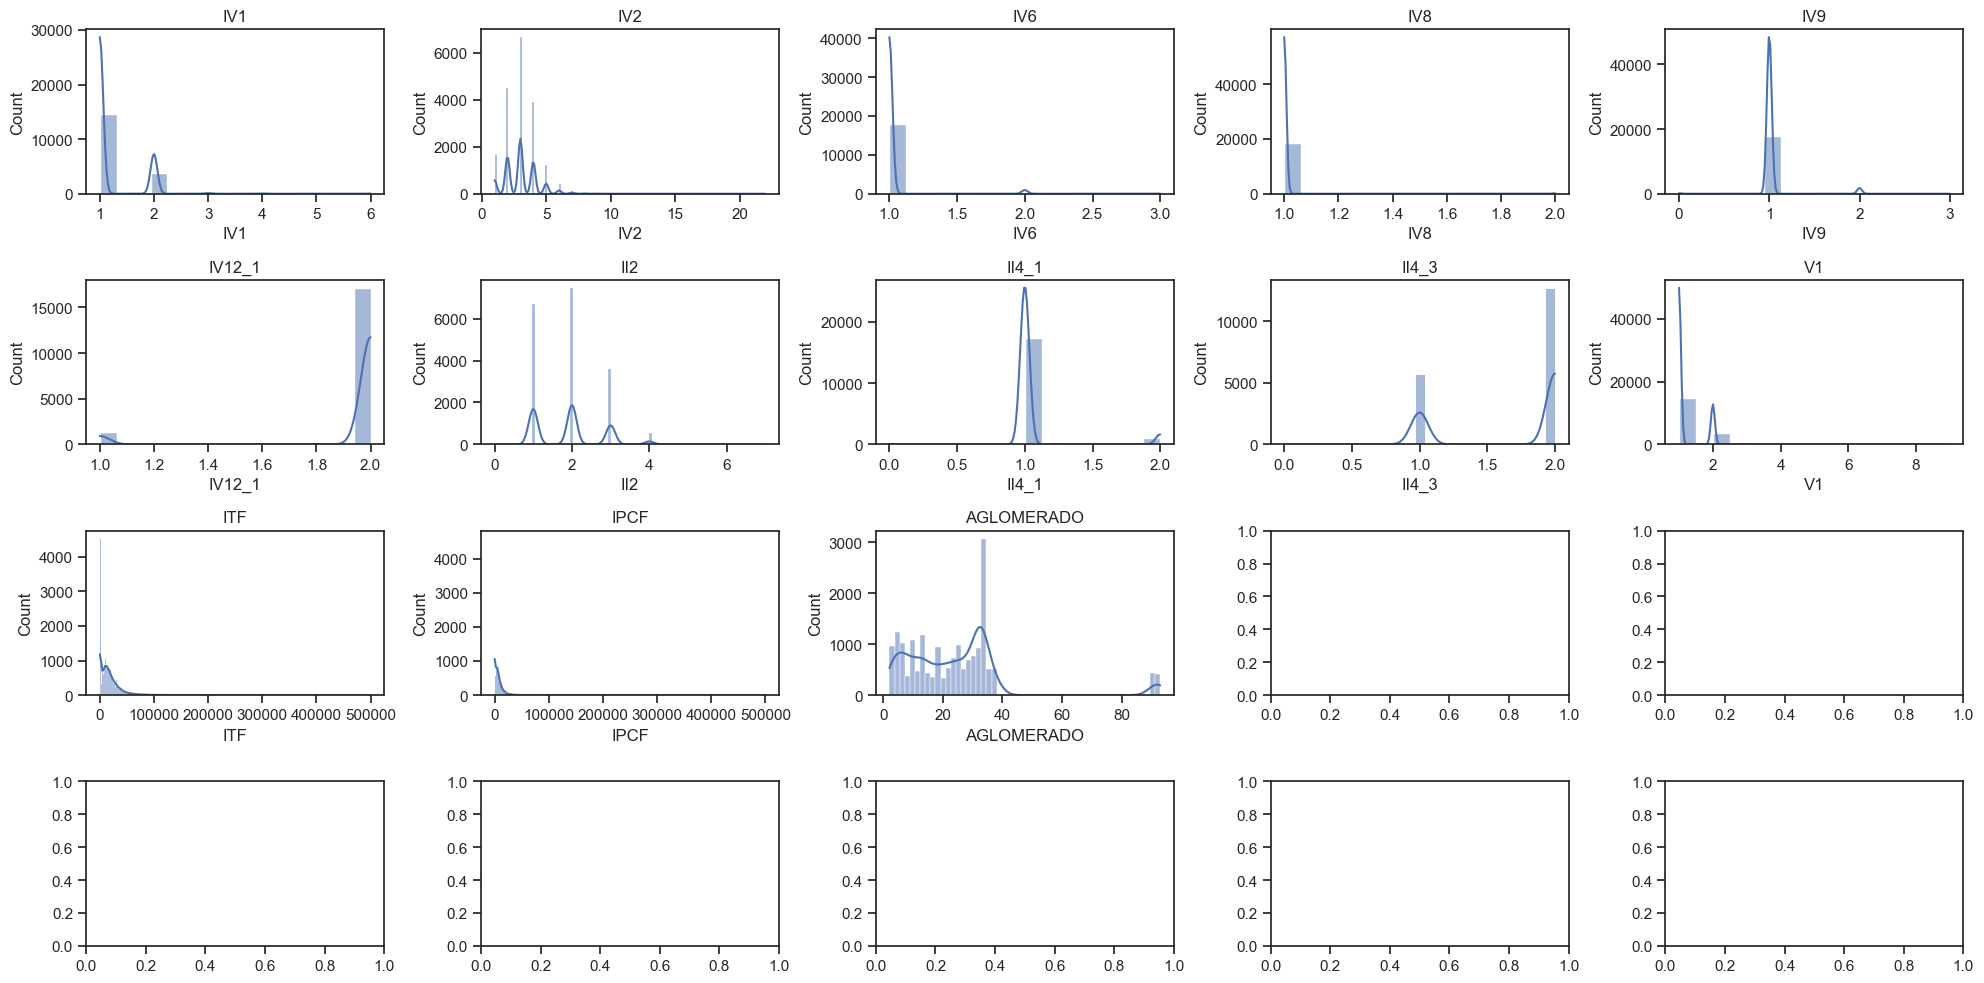

In [13]:
num_rows = 4
num_cols = 5
variable_names = list(var17.columns)
num_figures = len(variable_names)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))
for i, var_name in enumerate(variable_names):
    row_index = i // num_cols
    col_index = i % num_cols
    ax = axes[row_index, col_index]
    sns.histplot(data=var17[var_name], ax=ax, kde=True)
    ax.set_title(var_name)
plt.tight_layout()
plt.show()

/var/folders/vj/crlt_wk5433clrm0qp9q9f3w0000gn/T/ipykernel_20117/471659793.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=var17['ITF'], shade=True)


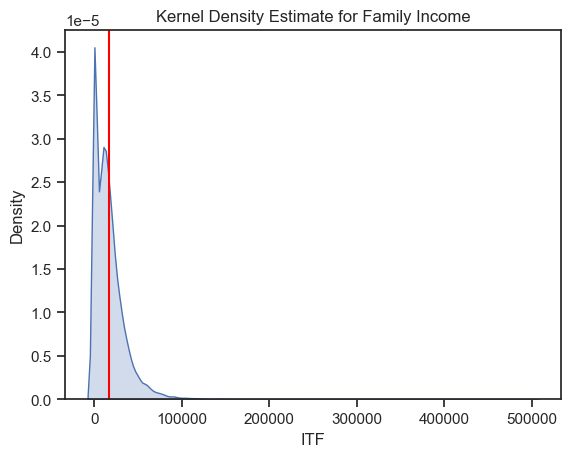

In [14]:
sns.kdeplot(data=var17['ITF'], shade=True)
mean_value = var17['ITF'].mean()
plt.axvline(x=mean_value, color='red')
plt.title(f"Kernel Density Estimate for Family Income")
plt.show()

In [15]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(var17)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

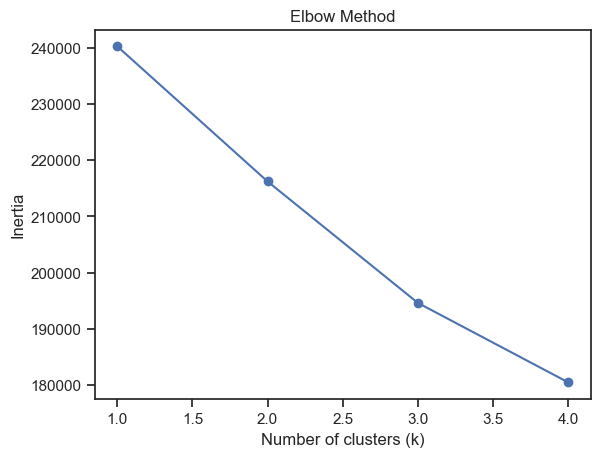

In [16]:
inertia = []
k_values = list(range(1, 5))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [17]:
k = 3 
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_clusters = kmeans.fit_predict(data_scaled)

/Users/mac/opt/miniconda3/envs/tfg/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


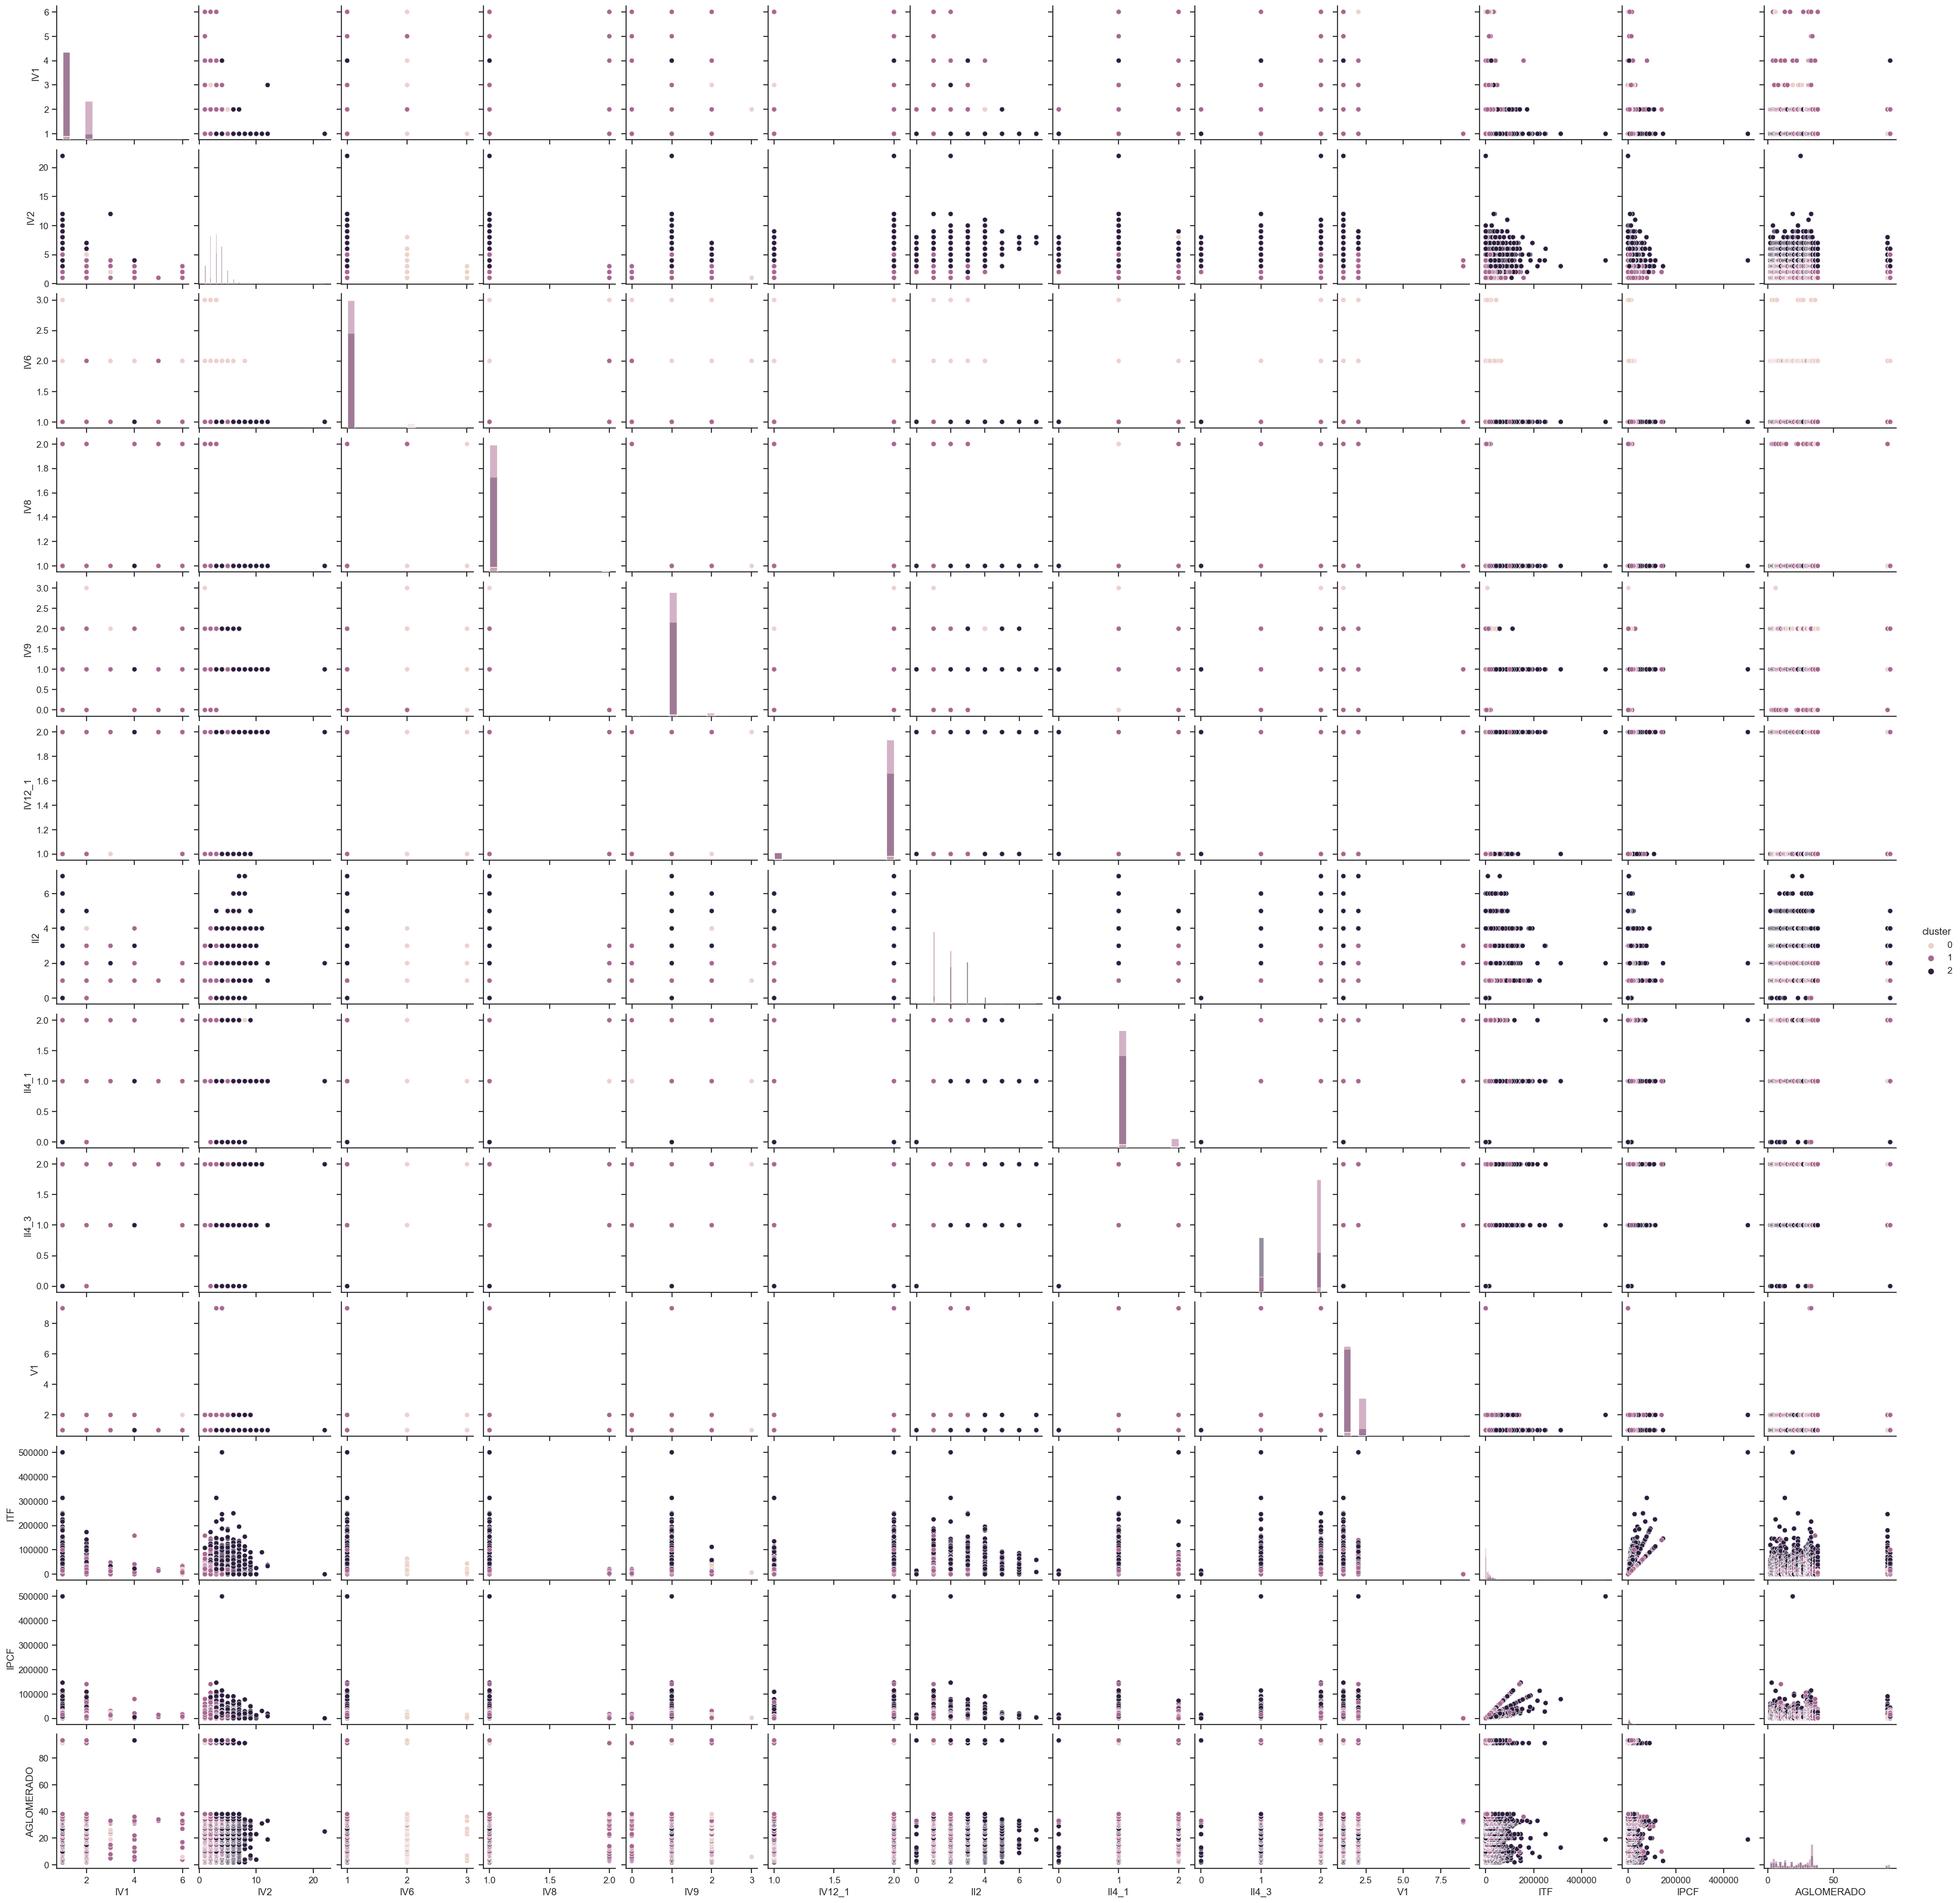

In [18]:
var17_clustered = var17.copy()
var17_clustered['cluster'] = kmeans_clusters
sns.pairplot(var17_clustered, hue='cluster', diag_kind='hist')
plt.show()

K-means Silhouette Score: 0.13498452431667607


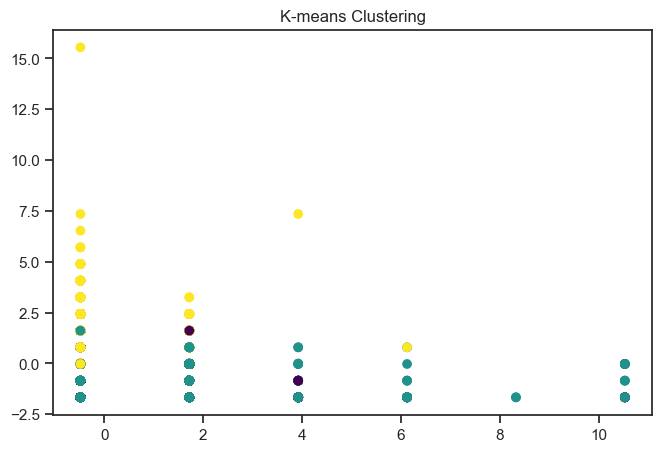

In [19]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_clusters)
print(f"K-means Silhouette Score: {kmeans_silhouette}")
plt.figure(figsize=(17, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.title('K-means Clustering')
plt.show()

In [20]:
#Count of classes
var17_clustered['cluster'].value_counts()

1    10371
2     7695
0      411
Name: cluster, dtype: int64

In [21]:
mean_income = var17_clustered.groupby('cluster')['ITF'].mean()
print(mean_income)

cluster
0    10807.518248
1    12366.403336
2    22529.477713
Name: ITF, dtype: float64


In [22]:
var17_clustered['cluster'] = var17_clustered['cluster'].replace({0:3, 1:2, 2:1})
var17_clustered['cluster'].value_counts()

2    10371
1     7695
3      411
Name: cluster, dtype: int64

# Sexual harrassment
There are 10,552 female victims of sexual harassment in 2017 in the ARGENTINA